In [ ]:
# Source 
# https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [5]:
# import libraries

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random 
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

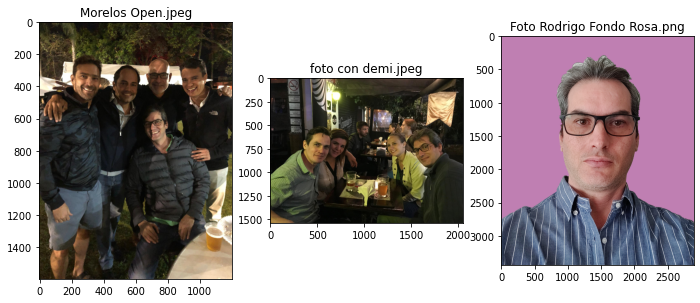

In [42]:
# Printing random 3 images from one of the folders

plt.figure(figsize=(20,20))
test_folder=r'E:\OneDrive\Pictures\2021'

for i in range(3):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Test Folder
<class 'str'>
E:\OneDrive\Pictures\2021
File List
<class 'list'>
['foto con demi.jpeg', 'Foto Rodrigo Fondo Rosa.png', 'Morelos Open.jpeg', 'Secundaria London.jpeg']
File Name
<class 'str'>
foto con demi.jpeg
File Path
<class 'str'>
E:\OneDrive\Pictures\2021\foto con demi.jpeg
Image Array
<class 'numpy.ndarray'>
[[[145  74  56]
  [144  73  55]
  [145  74  56]
  ...
  [ 13  13  11]
  [ 12  12  10]
  [ 10  10   8]]

 [[141  68  51]
  [140  69  49]
  [145  72  55]
  ...
  [ 10  10   8]
  [ 11  11   9]
  [  9   9   7]]

 [[137  62  43]
  [137  65  43]
  [143  68  49]
  ...
  [ 10  10   8]
  [ 12  12  10]
  [ 10  10   8]]

 ...

 [[136 106  33]
  [142 112  39]
  [143 113  40]
  ...
  [ 18  21  14]
  [ 16  19  12]
  [ 15  18  11]]

 [[124  94  21]
  [136 106  33]
  [143 113  40]
  ...
  [ 22  25  18]
  [ 20  23  16]
  [ 18  21  14]]

 [[115  85  12]
  [131 101  28]
  [142 112  39]
  ...
  [ 27  30  23]
  [ 26  29  22]
  [ 24  27  20]]]
Actual Image


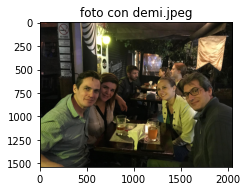

In [43]:
# Printing one image from one of the folders

print("Test Folder")
test_folder=r'E:\OneDrive\Pictures\2021'
print(type(test_folder))
print(test_folder)

print("File List")
file_list = os.listdir(test_folder)
print(type(file_list))
print(file_list)

print("File Name")
file_name = os.listdir(test_folder)[0]
print(type(file_name))
print(file_name)

print("File Path")
file_path= os.path.join(test_folder, file_name)
print(type(file_path))
print(file_path)

print("Image Array")
image_array = mpimg.imread(file_path)
print(type(image_array))
print(image_array)

print("Actual Image")
plt.figure(figsize=(20,20))
ax=plt.subplot(1,5,i+1)
ax.title.set_text(file_name)
plt.imshow(image_array)

In [28]:
# Setting the Image dimension and source folder for loading the dataset

IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'E:\OneDrive\Pictures\2021'

In [ ]:
# Creating the image data and the labels from the images in the folder

# In the function below

#     The source folder is the input parameter containing the images for different classes.
#     Read the image file from the folder and convert it to the right color format.
#     Resize the image based on the input dimension required for the model
#     Convert the image to a Numpy array with float32 as the datatype
#     Normalize the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution, which helps with faster convergence.

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name
    
img_data, class_name =create_dataset(r'CV\Intel_Images\seg_train\seg_train')

In [ ]:
# Converting text labels to numeric codes
# Create a dictionary for all unique values for the classes

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

In [ ]:
# Convert the class_names to their respective numeric value based on the dictionary

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
# Creating a simple deep learning model and compiling it

model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])encoder.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# We finally fit our dataset to train the model. We can use Numpy array as the input

history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

In [ ]:
# We can also convert the input data to tensors to train the model by using tf.cast()

history = model.fit(x=tf.cast(np.array(img_data), tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=5)